# 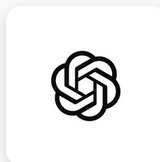

# Proposition and Functional Specification

## Proposition:

Insert a new order line entry into the `Sales.OrderLines` table to capture details about the sale of a specific product.

## Functional Specification

### Query Name:

`Insert_New_OrderLine`

### Description:

This query inserts a new row into the `Sales.OrderLines` table for an order containing details about a newly added product, including its ID, description, quantity, price, and other relevant attributes.

### Inputs:

- **OrderID**: 1001
- **StockItemID**: 23
- **Description**: 'New Product A'
- **Quantity**: 5
- **UnitPrice**: 99.99
- **PackageTypeID**: 2
- **TaxRate**: 5.0
- **PickedQuantity**: 5
- **LastEditedBy**: 1

### Outputs:

A new row is successfully inserted into the `Sales.OrderLines` table. No output is returned directly from the query unless monitored through an `INSERT` confirmation.

### Steps:

1. Verify that the `OrderID` (1001) exists in the `Sales.Orders` table to ensure data integrity.
2. Ensure that the `StockItemID` (23) refers to a valid product in the `StockItems` table.
3. Confirm that `PackageTypeID` (2) exists within the `PackageTypes` reference table.
4. Validate that the `LastEditedBy` value (1) corresponds to a valid employee in the system.
5. Execute the `INSERT` query to add the new order line.

### Assumptions:

- The `OrderID` exists and is valid.
- The `LastEditedBy` value corresponds to an active employee.
- The stock item and package type IDs are correctly mapped in the system.

### Example Output:

The following row is added to the `Sales.OrderLines` table:

| OrderID | StockItemID | Description | Quantity | UnitPrice | PackageTypeID | TaxRate | PickedQuantity | LastEditedBy |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1001 | 23 | New Product A | 5 | 99.99 | 2 | 5.0 | 5 | 1 |

In [4]:
UPDATE Sales.Invoices
SET IsCreditNote = 1, CreditNoteReason = 'Customer returned product'
WHERE InvoiceID = 101;

(1 row affected)

Total execution time: 00:00:00.005

# Proposition and Functional Specification

## Proposition:
Update the `Sales.Invoices` table to mark an invoice as a credit note due to a product return.

## Functional Specification

### Query Name:
`Update_Invoice_CreditNote`

### Description:
This query updates the `Sales.Invoices` table to reflect that a specific invoice has been converted to a credit note due to a customer's product return.

### Inputs:
- **InvoiceID**: 101  
- **IsCreditNote**: 1  
- **CreditNoteReason**: 'Customer returned product'

### Outputs:
- The `IsCreditNote` field is set to 1 for the specified invoice.
- The `CreditNoteReason` is updated to 'Customer returned product' for the same invoice.

### Steps:
1. Identify the invoice with `InvoiceID` 101 in the `Sales.Invoices` table.
2. Set the `IsCreditNote` field to 1, indicating that it is now a credit note.
3. Update the `CreditNoteReason` field to 'Customer returned product' to provide context for the credit note.
4. Verify that the update affects exactly one row to ensure data accuracy.

### Assumptions:
- Invoice with `InvoiceID` 101 exists in the `Sales.Invoices` table.
- No other updates or triggers interfere with this operation.

### Example Output:
The following row is updated in the `Sales.Invoices` table:

| InvoiceID | IsCreditNote | CreditNoteReason           |
|-----------|--------------|----------------------------|
| 101       | 1            | Customer returned product  |

# Proposition and Functional Specification

## Proposition:
Update the `Sales.Invoices` table to mark an invoice as a credit note due to a product return.

## Functional Specification

### Query Name:
`Update_Invoice_CreditNote`

### Description:
This query updates the `Sales.Invoices` table to reflect that a specific invoice has been converted to a credit note due to a customer's product return.

### Inputs:
- **InvoiceID**: 101  
- **IsCreditNote**: 1  
- **CreditNoteReason**: 'Customer returned product'

### Outputs:
- The `IsCreditNote` field is set to 1 for the specified invoice.
- The `CreditNoteReason` is updated to 'Customer returned product' for the same invoice.

### Steps:
1. Identify the invoice with `InvoiceID` 101 in the `Sales.Invoices` table.
2. Set the `IsCreditNote` field to 1, indicating that it is now a credit note.
3. Update the `CreditNoteReason` field to 'Customer returned product' to provide context for the credit note.
4. Verify that the update affects exactly one row to ensure data accuracy.

### Assumptions:
- Invoice with `InvoiceID` 101 exists in the `Sales.Invoices` table.
- No other updates or triggers interfere with this operation.

### Example Output:
The following row is updated in the `Sales.Invoices` table:

| InvoiceID | IsCreditNote | CreditNoteReason           |
|-----------|--------------|----------------------------|
| 101       | 1            | Customer returned product  |



In [5]:
INSERT INTO Sales.OrderLines 
(OrderID, StockItemID, Description, Quantity, UnitPrice, PackageTypeID, TaxRate, PickedQuantity, LastEditedBy) 
VALUES 
(1001, 23, 'New Product A', 5, 99.99, 2, 5.0, 5, 1);  -- Ensure LastEditedBy value is valid.

(1 row affected)

Total execution time: 00:00:00.018

# Proposition and Functional Specification

## Proposition:

Modify the foreign key constraint on the `Sales.OrderLines` table to enforce cascading deletes from the `Sales.Orders` table, then delete old orders placed before January 1, 2023.

## Functional Specification

### Query Name:

`Modify_Constraint_And_Delete_Old_Orders`

### Description:

This operation first alters the `Sales.OrderLines` table to modify the foreign key constraint for `OrderID` with a `CASCADE` delete rule. It ensures that when an order is deleted from the `Sales.Orders` table, all related order lines are automatically removed. After modifying the constraint, it deletes all orders placed before January 1, 2023.

### Steps:

1. **Drop the existing foreign key constraint**:
    - `FK_Sales_OrderLines_OrderID_Sales_Orders` is removed from the `Sales.OrderLines` table.
2. **Add the new foreign key constraint**:
    - A new constraint with `ON DELETE CASCADE` is added to `OrderID` in `Sales.OrderLines`, ensuring that related order lines are automatically deleted when their corresponding order is deleted.
3. **Delete orders placed before 2023**:
    - All orders with an `OrderDate` earlier than '2023-01-01' are deleted from `Sales.Orders`.
    - The related rows in `Sales.OrderLines` will also be deleted due to the cascading rule.

### Inputs:

- **OrderDate**: '2023-01-01'
- **OrderID**: Referenced in both `Sales.Orders` and `Sales.OrderLines`.

### Outputs:

- All orders older than January 1, 2023, are removed.
- Related order lines for these orders are deleted automatically due to the cascade constraint.

### Example:

If the following orders existed:

| OrderID | OrderDate |
| --- | --- |
| 1001 | 2022-12-25 |
| 1002 | 2023-01-05 |

In [6]:
ALTER TABLE Sales.OrderLines
DROP CONSTRAINT FK_Sales_OrderLines_OrderID_Sales_Orders;

ALTER TABLE Sales.OrderLines
ADD CONSTRAINT FK_Sales_OrderLines_OrderID_Sales_Orders
FOREIGN KEY (OrderID) REFERENCES Sales.Orders(OrderID)
ON DELETE CASCADE;

DELETE FROM Sales.Orders
WHERE OrderDate < '2023-01-01';

: Msg 547, Level 16, State 0, Line 9
The DELETE statement conflicted with the REFERENCE constraint "FK_Sales_Invoices_OrderID_Sales_Orders". The conflict occurred in database "NewWideWorldImporters", table "Sales.Invoices", column 'OrderID'.

The statement has been terminated.

Total execution time: 00:00:09.599

# Proposition and Functional Specification

## Proposition:
Retrieve the names and populations of cities with a population greater than 1 million.

## Functional Specification

### Query Name:
`Select_Cities_With_High_Population`

### Description:
This query retrieves the `CityName` and `LatestRecordedPopulation` from the `Application.Cities` table for cities where the population exceeds 1 million.

### Inputs:
- **LatestRecordedPopulation**: Population threshold of 1,000,000.

### Outputs:
- **CityName**: Name of the city.
- **LatestRecordedPopulation**: Population of the city.

### Steps:
1. Query the `Application.Cities` table.
2. Filter results to include only cities with a `LatestRecordedPopulation` greater than 1,000,000.
3. Return the `CityName` and `LatestRecordedPopulation` for qualifying cities.

### Assumptions:
- The `LatestRecordedPopulation` values are accurate and up-to-date.
- The population data is not null or contains no negative values.

### Example Output:
| CityName       | LatestRecordedPopulation |
|----------------|--------------------------|
| New York       | 8,336,817                |
| Los Angeles    | 3,979,576                |
| Tokyo          | 13,515,271               |



In [7]:
SELECT CityName, LatestRecordedPopulation
FROM Application.Cities
WHERE LatestRecordedPopulation > 1000000

(13 rows affected)

Total execution time: 00:00:00.023

CityName,LatestRecordedPopulation
Brooklyn,2565635
Chicago,2695598
Dallas,1197816
Houston,2099451
Los Angeles,3792621
Manhattan,1619090
New York,8175133
Philadelphia,1526006
Phoenix,1445632
Queens,2272771


# Proposition and Functional Specification

## Proposition:
Synchronize new customer transactions from the `Sales.CustomerTransactions` table to the `Sales.CustomerTransactions_Archive` table by inserting any transactions that do not already exist in the archive.

## Functional Specification

### Query Name:
`Merge_CustomerTransactions_To_Archive`

### Description:
This query merges data from the `Sales.CustomerTransactions` table into the `Sales.CustomerTransactions_Archive` table. If a transaction from the source table (`Sales.CustomerTransactions`) does not exist in the target table (`Sales.CustomerTransactions_Archive`), it will be inserted into the archive.

### Inputs:
- **CustomerTransactionID**: Unique identifier of each transaction.
- **CustomerID**: ID of the customer involved.
- **TransactionTypeID**: Type of transaction (purchase, refund, etc.).
- **InvoiceID**: Reference to the related invoice.
- **PaymentMethodID**: Payment method used.
- **TransactionDate**: Date of the transaction.
- **AmountExcludingTax**: Amount without tax.
- **TaxAmount**: Tax amount for the transaction.
- **TransactionAmount**: Total amount including tax.
- **OutstandingBalance**: Any remaining balance.
- **FinalizationDate**: Date the transaction was finalized.
- **IsFinalized**: Status indicating if the transaction is finalized.
- **LastEditedBy**: User who last edited the transaction.
- **LastEditedWhen**: Timestamp of the last edit.

### Outputs:
- New transactions from the `Sales.CustomerTransactions` table that do not exist in the archive are inserted into the `Sales.CustomerTransactions_Archive` table.

### Steps:
1. Use the `MERGE` statement to compare transactions between `Sales.CustomerTransactions` (source) and `Sales.CustomerTransactions_Archive` (target).
2. For transactions not found in the archive (`WHEN NOT MATCHED`), insert the corresponding rows.
3. Preserve all relevant columns during the insertion to maintain the integrity of the archived data.

### Assumptions:
- There are no duplicate `CustomerTransactionID` values in either table.
- Both source and target tables have identical schemas for relevant columns.
- The source table contains up-to-date transaction information.

In [8]:
MERGE Sales.CustomerTransactions_Archive AS TGT
USING Sales.CustomerTransactions AS SRC
ON TGT.CustomerTransactionID = SRC.CustomerTransactionID
WHEN NOT MATCHED THEN
    INSERT (CustomerTransactionID, CustomerID, TransactionTypeID, InvoiceID, PaymentMethodID, 
            TransactionDate, AmountExcludingTax, TaxAmount, TransactionAmount, 
            OutstandingBalance, FinalizationDate, IsFinalized, LastEditedBy, LastEditedWhen)
    VALUES (SRC.CustomerTransactionID, SRC.CustomerID, SRC.TransactionTypeID, SRC.InvoiceID, 
            SRC.PaymentMethodID, SRC.TransactionDate, SRC.AmountExcludingTax, 
            SRC.TaxAmount, SRC.TransactionAmount, SRC.OutstandingBalance, 
            SRC.FinalizationDate, SRC.IsFinalized, SRC.LastEditedBy, SRC.LastEditedWhen);

(0 rows affected)

Total execution time: 00:00:00.121

# Proposition and Functional Specification

## Proposition:
Insert a new special deal into the `Sales.SpecialDeals` table and return the newly inserted `SpecialDealID` and `DealDescription`.

## Functional Specification

### Query Name:
`Insert_Special_Deal_With_Output`

### Description:
This query adds a new special deal for the holiday season to the `Sales.SpecialDeals` table. It uses the `OUTPUT` clause to return the `SpecialDealID` and `DealDescription` of the inserted row.

### Inputs:
- **DealDescription**: 'Holiday Discount'  
- **StartDate**: '2024-12-01'  
- **EndDate**: '2024-12-31'  
- **DiscountPercentage**: 15.0  

### Outputs:
- **SpecialDealID**: The ID of the newly inserted deal.
- **DealDescription**: The description of the new deal.

### Steps:
1. Insert a new row into the `Sales.SpecialDeals` table with the provided values.
2. Use the `OUTPUT` clause to retrieve the `SpecialDealID` and `DealDescription` of the newly added deal.

### Assumptions:
- The table has an auto-incrementing `SpecialDealID`.
- The dates and percentage values are valid and align with the table's constraints.

In [9]:
INSERT INTO Sales.SpecialDeals (DealDescription, StartDate, EndDate, DiscountPercentage)
OUTPUT INSERTED.SpecialDealID, INSERTED.DealDescription
VALUES ('Holiday Discount', '2024-12-01', '2024-12-31', 15.0);

The statement has been terminated.

Total execution time: 00:00:00.016

SpecialDealID,DealDescription


: Msg 515, Level 16, State 2, Line 1
Cannot insert the value NULL into column 'LastEditedBy', table 'NewWideWorldImporters.Sales.SpecialDeals'; column does not allow nulls. INSERT fails.

# Proposition and Functional Specification

## Proposition:
Update the `LastEditedBy` field for specific cities in the `Application.Cities` table.

## Functional Specification

### Query Name:
`Update_Cities_LastEditedBy`

### Description:
This query updates the `LastEditedBy` field for cities with `CityID` values 1, 2, and 3, setting it to a specified user ID.

### Inputs:
- **CityID**: 1, 2, 3  
- **LastEditedBy**: 10  

### Outputs:
- The `LastEditedBy` field for the specified cities is updated to 10.

### Steps:
1. Identify the cities with `CityID` values of 1, 2, and 3.
2. Update their `LastEditedBy` field to 10, indicating they were last edited by this user.
3. Verify that the correct rows are updated without any errors.

### Assumptions:
- The `CityID` values (1, 2, 3) exist in the `Application.Cities` table.
- User ID 10 is a valid reference to an editor.

In [10]:
UPDATE Application.Cities
SET LastEditedBy = 10
WHERE CityID IN (1, 2, 3);

(2 rows affected)

Total execution time: 00:00:00.023

# Proposition and Functional Specification

## Proposition:
Insert a new invoice line into the `Sales.InvoiceLines` table to capture the details of a service provided.

## Functional Specification

### Query Name:
`Insert_New_InvoiceLine`

### Description:
This query adds a new row to the `Sales.InvoiceLines` table, recording details about a service offered, including the invoice, stock item, description, quantity, and unit price.

### Inputs:
- **InvoiceID**: 101  
- **StockItemID**: 12  
- **Description**: 'New Service'  
- **Quantity**: 2  
- **UnitPrice**: 499.99  

### Outputs:
- A new invoice line capturing the details of the provided service is added to the `Sales.InvoiceLines` table.

### Steps:
1. Ensure the `InvoiceID` (101) and `StockItemID` (12) are valid and exist in their respective tables.
2. Insert the new invoice line with the provided values.
3. Confirm that the correct values are stored, ensuring data consistency.

### Assumptions:
- `InvoiceID` 101 refers to a valid invoice.
- `StockItemID` 12 corresponds to an existing product or service.
- There are no constraints preventing the insertion (e.g., referential integrity violations).


In [11]:
INSERT INTO Sales.InvoiceLines (InvoiceID, StockItemID, Description, Quantity, UnitPrice)
VALUES (101, 12, 'New Service', 2, 499.99);

: Msg 515, Level 16, State 2, Line 1
Cannot insert the value NULL into column 'PackageTypeID', table 'NewWideWorldImporters.Sales.InvoiceLines'; column does not allow nulls. INSERT fails.

The statement has been terminated.

Total execution time: 00:00:00.007

# Proposition and Functional Specification

## Proposition:
Update the `PickingCompletedWhen` field for orders where the expected delivery date has already passed.

## Functional Specification

### Query Name:
`Update_Picking_Completed_Orders`

### Description:
This query updates the `PickingCompletedWhen` field for all orders whose `ExpectedDeliveryDate` is earlier than the current date. It sets the completion time to the current system date and time using `GETDATE()`.

### Inputs:
- **ExpectedDeliveryDate**: Orders with dates earlier than the current date.
- **PickingCompletedWhen**: Set to the current date and time (`GETDATE()`).

### Outputs:
- The `PickingCompletedWhen` field is updated for all applicable orders.

### Steps:
1. Identify all orders with an `ExpectedDeliveryDate` less than the current date using a subquery.
2. Update the `PickingCompletedWhen` field to the current date and time for these orders.
3. Verify that the correct rows are updated without conflicts or errors.

### Assumptions:
- The `Sales.Orders` table allows updates on the `PickingCompletedWhen` field.
- No constraints or triggers prevent updating the field with `GETDATE()`.

In [12]:
UPDATE Sales.Orders
SET PickingCompletedWhen = GETDATE()
WHERE OrderID IN (
    SELECT OrderID FROM Sales.Orders WHERE ExpectedDeliveryDate < GETDATE()
);

(73595 rows affected)

Total execution time: 00:00:00.323

# Proposition and Functional Specification

## Proposition:
Retrieve the total sales amount for each customer by aggregating their invoice line totals and list the results in descending order of total sales.

## Functional Specification

### Query Name:
`Select_Total_Sales_Per_Customer`

### Description:
This query calculates the total sales amount for each customer by multiplying the quantity and unit price of all invoice lines and summing them up. It joins the `Sales.Customers`, `Sales.Invoices`, and `Sales.InvoiceLines` tables to retrieve the necessary data and orders the results by total sales in descending order.

### Inputs:
- **CustomerID**: Unique identifier for each customer.
- **CustomerName**: Name of the customer.
- **Quantity**: Quantity of each item on the invoice line.
- **UnitPrice**: Price per unit of each item.

### Outputs:
- **CustomerID**: ID of the customer.
- **CustomerName**: Name of the customer.
- **TotalSalesAmount**: Total sales amount calculated by multiplying quantity by unit price and summing across all invoices for the customer.

### Steps:
1. Join `Sales.Customers` with `Sales.Invoices` on `CustomerID`.
2. Join `Sales.Invoices` with `Sales.InvoiceLines` on `InvoiceID`.
3. Calculate the total sales amount by multiplying `Quantity` by `UnitPrice` and summing the result for each customer.
4. Group the results by `CustomerID` and `CustomerName`.
5. Order the results by `TotalSalesAmount` in descending order.

### Assumptions:
- Each invoice and invoice line is correctly associated with a customer.
- Quantity and UnitPrice are valid numeric values.

In [3]:
SELECT 
    C.CustomerID, 
    C.CustomerName, 
    SUM(IL.Quantity * IL.UnitPrice) AS TotalSalesAmount
FROM 
    Sales.Customers C
JOIN 
    Sales.Invoices I ON C.CustomerID = I.CustomerID
JOIN 
    Sales.InvoiceLines IL ON I.InvoiceID = IL.InvoiceID
GROUP BY 
    C.CustomerID, C.CustomerName
ORDER BY 
    TotalSalesAmount DESC;

(663 rows affected)

Total execution time: 00:00:00.093

CustomerID,CustomerName,TotalSalesAmount
149,"Tailspin Toys (Inguadona, MN)",381585.35
132,"Tailspin Toys (Minidoka, ID)",371822.30
977,Mauno Laurila,369058.30
580,"Wingtip Toys (Sarversville, PA)",365427.00
954,Nasrin Omidzadeh,361939.75
14,"Tailspin Toys (Long Meadow, MD)",360901.50
964,Ingrida Zeltina,359859.45
472,"Wingtip Toys (San Jacinto, CA)",355293.35
996,Laszlo Gardenier,354680.80
841,Camille Authier,353499.15
